In [1]:
# train_indicator_data.csvの26項目について相関係数を求める

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
# Dataframeを最大100行まで省略せずに出力できるようにする
pd.set_option('display.max_rows', 100)

In [5]:
# Dataframeを最大109列まで省略せずに出力できるようにする
pd.set_option('display.max_columns', 109)

In [6]:
# train_indicator_data.csvを読み込む
df_train_indicator_data = pd.read_csv("./提供データ/train_indicator_data.csv", sep=";")

In [7]:
# 読み込んだデータを確認
df_train_indicator_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data type,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value
2,Number of lag days,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,category,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator
4,NaN,Manufacturing ISM Composite Index,Manufacturing ISM New Orders,Manufacturing ISM Production,Manufacturing ISM Backlog of Orders,Manufacturing ISM Employment,Manufacturing ISM Inventories,Manufacturing ISM Unfilled Orders,Manufacturing ISM Exports,Manufacturing ISM Imports,Non-Manufacturing ISM Composite Index,Non-Manufacturing ISM Business Activity,Non-Manufacturing ISM New Orders,Non-Manufacturing ISM Employment,Non-Manufacturing ISM Backlog of Orders,Non-Manufacturing ISM Inventories,Non-Manufacturing ISM Exports,Non-Manufacturing ISM Imports,Total Private Housing Starts Seasonally Adjusted,Total Private Housing Permits Seasonally Adjusted,Existing-Home Sales Seasonally Adjusted,New Single-Family Home Sales Seasonally Adjusted,Philadelphia Federal Reserve Business Conditio...,Empire State Manufacturing Survey General Busi...,Chicago Purchasing Managers' Index Seasonally ...,Conference Board Consumer Confidence Index Sea...,University of Michigan Consumer Sentiment Index
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,12/26/16,"53,2",53,55,54,"51,6",50,"48,7","51,8","50,5","57,2","41,9","58,6","55,2",52,"60,5",57,54,1090,1201,"5,61",592,"21,5",9,"57,6","107,1","98,2"
5157,12/27/16,"53,2",53,55,54,"51,6",50,"48,7","51,8","50,5","57,2","41,9","58,6","55,2",52,"60,5",57,54,1090,1201,"5,61",592,"21,5",9,"57,6","113,7","98,2"
5158,12/28/16,"53,2",53,55,54,"51,6",50,"48,7","51,8","50,5","57,2","41,9","58,6","55,2",52,"60,5",57,54,1090,1201,"5,61",592,"21,5",9,"57,6","113,7","98,2"
5159,12/29/16,"53,2",53,55,54,"51,6",50,"48,7","51,8","50,5","57,2","41,9","58,6","55,2",52,"60,5",57,54,1090,1201,"5,61",592,"21,5",9,"57,6","113,7","98,2"


In [8]:
# train_indicator_dataのDataframeをコピー
df_train_indicator_data_processed = df_train_indicator_data.copy()

In [9]:
# コピーしたDataframeの各要素について、カンマを小数点に変換しfloatにも変換
for i in range(6, len(df_train_indicator_data_processed)):
    for j in range(1, len(df_train_indicator_data_processed.columns)):
        data = df_train_indicator_data_processed.iloc[i,j]
        if (type(data) == str):
            df_train_indicator_data_processed.iloc[i,j] = float(data.replace(',','.'))

In [10]:
# ちゃんとカンマが小数点に直っていることを確認
df_train_indicator_data_processed.head(50)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data type,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value,original value
2,Number of lag days,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,category,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator,Economic indicator
4,NaN,Manufacturing ISM Composite Index,Manufacturing ISM New Orders,Manufacturing ISM Production,Manufacturing ISM Backlog of Orders,Manufacturing ISM Employment,Manufacturing ISM Inventories,Manufacturing ISM Unfilled Orders,Manufacturing ISM Exports,Manufacturing ISM Imports,Non-Manufacturing ISM Composite Index,Non-Manufacturing ISM Business Activity,Non-Manufacturing ISM New Orders,Non-Manufacturing ISM Employment,Non-Manufacturing ISM Backlog of Orders,Non-Manufacturing ISM Inventories,Non-Manufacturing ISM Exports,Non-Manufacturing ISM Imports,Total Private Housing Starts Seasonally Adjusted,Total Private Housing Permits Seasonally Adjusted,Existing-Home Sales Seasonally Adjusted,New Single-Family Home Sales Seasonally Adjusted,Philadelphia Federal Reserve Business Conditio...,Empire State Manufacturing Survey General Busi...,Chicago Purchasing Managers' Index Seasonally ...,Conference Board Consumer Confidence Index Sea...,University of Michigan Consumer Sentiment Index
5,Dates,NAPMPMIIndex,NAPMNEWOIndex,NAPMPRODIndex,NAPMSUPLIndex,NAPMEMPLIndex,NAPMINVIndex,NAPMBACKIndex,NAPMEXPTIndex,NAPMIMPTIndex,NAPMNMIIndex,NAPMNMANIndex,NAPMNNOIndex,NAPMNEMPIndex,NAPMNSDIndex,NAPMNISIndex,NAPMNNEOIndex,NAPMNIMPIndex,NHSPSTOTIndex,NHSPATOTIndex,ETSLTOTLIndex,NHSLTOTIndex,OUTFGAFIndex,EMPRGBCIIndex,CHPMINDXIndex,CONCCONFIndex,CONSSENTIndex
6,3/31/97,53.1,57.6,58.9,52.1,45.9,41.3,48.5,54.6,53.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1486.0,1445.0,NaN,801.0,21.1,NaN,57.5,118.5,100.0
7,4/1/97,55.0,58.6,55.0,53.1,50.8,43.5,51.5,55.7,48.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1486.0,1445.0,NaN,801.0,21.1,NaN,57.5,118.5,100.0
8,4/2/97,55.0,58.6,55.0,53.1,50.8,43.5,51.5,55.7,48.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1486.0,1445.0,NaN,801.0,21.1,NaN,57.5,118.5,100.0
9,4/3/97,55.0,58.6,55.0,53.1,50.8,43.5,51.5,55.7,48.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1486.0,1445.0,NaN,801.0,21.1,NaN,57.5,118.5,100.0


In [11]:
# 要らない行と列を削除し、dtypeをfloat64に変換（こうしないと相関係数計算できない）
df_train_indicator_data_processed = df_train_indicator_data_processed.iloc[6:,1:].astype('float64')

# ちゃんとfloat64に変換できたかを確認
print(df_train_indicator_data_processed.dtypes)

Unnamed: 1     float64
Unnamed: 2     float64
Unnamed: 3     float64
Unnamed: 4     float64
Unnamed: 5     float64
Unnamed: 6     float64
Unnamed: 7     float64
Unnamed: 8     float64
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
Unnamed: 18    float64
Unnamed: 19    float64
Unnamed: 20    float64
Unnamed: 21    float64
Unnamed: 22    float64
Unnamed: 23    float64
Unnamed: 24    float64
Unnamed: 25    float64
Unnamed: 26    float64
dtype: object


In [12]:
# 相関係数を求める
df_train_indicator_corr = df_train_indicator_data_processed.corr()

In [13]:
# 相関係数を確認（26×26マスの表）
df_train_indicator_corr

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
Unnamed: 1,1.000000,0.910692,0.929099,0.720484,0.836152,0.599704,0.847326,0.733615,0.746344,0.734450,0.279131,0.751256,0.576990,0.417098,-0.394846,0.491640,0.551741,0.190984,0.192926,0.368273,0.165532,0.795517,0.727353,0.824210,0.154335,0.240052
Unnamed: 2,0.910692,1.000000,0.924844,0.619710,0.686175,0.386456,0.848176,0.694835,0.689017,0.618534,0.284405,0.669961,0.440363,0.334068,-0.351090,0.446719,0.504799,0.197902,0.196139,0.379698,0.182558,0.762095,0.740953,0.710590,0.148637,0.248509
Unnamed: 3,0.929099,0.924844,1.000000,0.653522,0.763118,0.442157,0.820442,0.713196,0.698744,0.654181,0.263616,0.699950,0.488215,0.369284,-0.355775,0.457069,0.482540,0.159098,0.156579,0.333109,0.143207,0.763892,0.732281,0.770217,0.126791,0.218416
Unnamed: 4,0.720484,0.619710,0.653522,1.000000,0.624841,0.396033,0.649146,0.603561,0.523766,0.423404,0.267316,0.449778,0.252811,0.438347,-0.337898,0.299995,0.346525,0.162929,0.165132,0.376053,0.200139,0.543185,0.571586,0.566273,-0.002627,0.078012
Unnamed: 5,0.836152,0.686175,0.763118,0.624841,1.000000,0.738992,0.647999,0.686785,0.631907,0.676717,0.049686,0.674564,0.647591,0.305245,-0.433495,0.413816,0.398312,-0.073305,-0.063738,0.140421,-0.080399,0.601691,0.548208,0.786725,0.017711,0.061051
Unnamed: 6,0.599704,0.386456,0.442157,0.396033,0.738992,1.000000,0.398895,0.506117,0.509458,0.572037,-0.097743,0.541182,0.618316,0.181037,-0.385059,0.322222,0.323390,-0.088044,-0.071944,0.058920,-0.131581,0.385439,0.306479,0.606078,-0.041429,-0.017673
Unnamed: 7,0.847326,0.848176,0.820442,0.649146,0.647999,0.398895,1.000000,0.684683,0.671312,0.578554,0.356184,0.618297,0.413092,0.379999,-0.364631,0.432422,0.479600,0.240099,0.240439,0.406100,0.232940,0.680409,0.683943,0.670870,0.187820,0.249792
Unnamed: 8,0.733615,0.694835,0.713196,0.603561,0.686785,0.506117,0.684683,1.000000,0.609154,0.456558,0.161652,0.472218,0.363662,0.257196,-0.385406,0.437109,0.461212,0.094694,0.087331,0.320411,0.131921,0.489151,0.638653,0.635211,-0.067951,-0.063824
Unnamed: 9,0.746344,0.689017,0.698744,0.523766,0.631907,0.509458,0.671312,0.609154,1.000000,0.698887,0.462295,0.684467,0.626080,0.420426,-0.251930,0.489161,0.632126,0.460297,0.469680,0.540467,0.436077,0.627337,0.679350,0.650008,0.313612,0.385190
Unnamed: 10,0.734450,0.618534,0.654181,0.423404,0.676717,0.572037,0.578554,0.456558,0.698887,1.000000,0.421661,0.945633,0.872739,0.558977,-0.213196,0.556288,0.612777,0.384759,0.395794,0.405818,0.317674,0.679842,0.567066,0.665713,0.457973,0.530462


In [15]:
# 相関係数の表をcsvファイルに保存
df_train_indicator_corr.to_csv('./train_indicator_data_correlation.csv')

<AxesSubplot: >

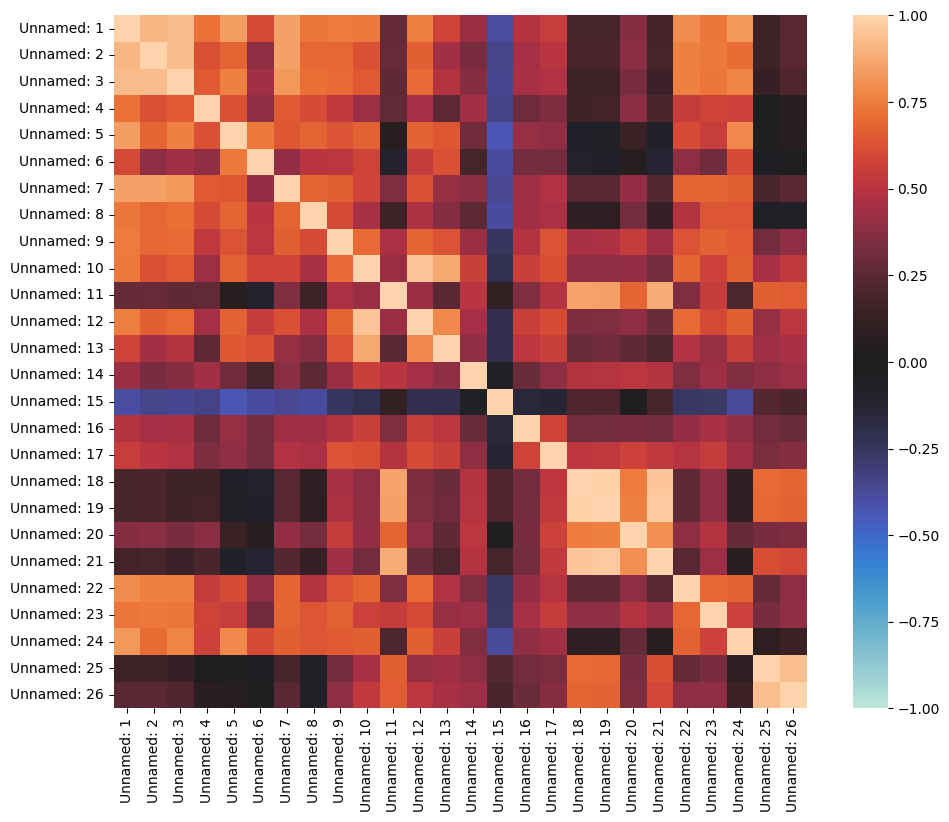

In [17]:
# ヒートマップも作ってみる
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train_indicator_corr, square=True, vmax=1, vmin=-1, center=0)

In [ ]:
# 学習用データ.xlsxの107項目のお互いの相関係数を求める

In [18]:
# 学習用データ.xlsxを読み込む
df_train_data = pd.read_excel('./提供データ/学習用データ.xlsx')

In [19]:
# 読み込んだデータを確認
df_train_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,注）金利系は、リターン化する際には差分を取る,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,データ種類,リターン,リターン,リターン,リターン,リターン,リターン,リターン,リターン,リターン,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,原数値,リターン,リターン,リターン,リターン,リターン,原数値,原数値,原数値
2,設定すべきラグ日数,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,カテゴリ,目的変数関連,目的変数関連,目的変数関連,主要指数,主要指数,主要指数,主要指数,主要指数,主要指数,クレジット系,クレジット系,クレジット系,クレジット系,クレジット系,クレジット系,クレジット系,クレジット系,クレジット系,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,米国株セクター指数,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,金利系,為替系,為替系,為替系,為替系,為替系,為替系,為替系,為替系,為替系,商品系,商品系,商品系,商品系,商品系,商品系,商品系,その他
4,NaN,米国株（先物）,米国債（先物）,株40債券60ポート,日本株（先物）,日本債（先物）,欧州株（先物）,欧州債（先物）,香港株（先物）,EM株（指数）,IG トータルリターン,IG トータルリターン(円建),Aaa社債 トータルリターン,Aa社債 トータルリターン,A社債 トータルリターン,Baa社債 トータルリターン,BB社債 トータルリターン,B社債 トータルリターン,EM トータルリターン,セクター指数（テクノロジー）,セクター指数（フィナンシャル）,セクター指数（ヘルスケア）,セクター指数（エネルギー）,セクター指数（一般消費財）,セクター指数（生活必需品）,セクター指数（産業財）,セクター指数（公益）,セクター指数（素材）,セクター指数（不動産）,セクター指数（通信）,米金利2年,米金利3年,米金利5年,米金利7年,米金利10年,米金利20年,米金利30年,米金利スプレッド3年-2年,米金利スプレッド5年-2年,米金利スプレッド7年-2年,米金利スプレッド10年-2年,米金利スプレッド20年-2年,米金利スプレッド30年-2年,米金利スプレッド5年-3年,米金利スプレッド7年-3年,米金利スプレッド10年-3年,米金利スプレッド20年-3年,米金利スプレッド30年-3年,米金利スプレッド7年-5年,米金利スプレッド10年-5年,米金利スプレッド20年-5年,米金利スプレッド30年-5年,米金利スプレッド10年-7年,米金利スプレッド20年-7年,米金利スプレッド30年-7年,米金利スプレッド20年-10年,米金利スプレッド30年-10年,米金利スプレッド30年-20年,米金利バタフライ2-3-5,米金利バタフライ2-3-7,米金利バタフライ2-3-10,米金利バタフライ2-3-20,米金利バタフライ2-3-30,米金利バタフライ2-5-7,米金利バタフライ2-5-10,米金利バタフライ2-5-20,米金利バタフライ2-5-30,米金利バタフライ2-7-10,米金利バタフライ2-7-20,米金利バタフライ2-7-30,米金利バタフライ2-10-20,米金利バタフライ2-10-30,米金利バタフライ3-5-7,米金利バタフライ3-5-10,米金利バタフライ3-5-20,米金利バタフライ3-5-30,米金利バタフライ3-7-10,米金利バタフライ3-7-20,米金利バタフライ3-7-30,米金利バタフライ3-10-2

In [20]:
# train_dataのDataframeをコピー
df_train_data_processed = df_train_data.copy()

In [21]:
# 要らない行と列を削除し、dtypeをfloat64に変換（こうしないと相関係数計算できない）
df_train_data_processed = df_train_data_processed.iloc[6:,1:].astype('float64')

# ちゃんとfloat64になっているか確認
print(df_train_data_processed.dtypes)

Unnamed: 1      float64
Unnamed: 2      float64
Unnamed: 3      float64
Unnamed: 4      float64
Unnamed: 5      float64
                 ...   
Unnamed: 103    float64
Unnamed: 104    float64
Unnamed: 105    float64
Unnamed: 106    float64
Unnamed: 107    float64
Length: 107, dtype: object


In [22]:
# ちゃんと整形されたか確認
df_train_data_processed

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
6,0.007346,-0.001362,0.002121,0.036825,0.001509,0.009022,-0.000526,0.021570,0.001105,1009.46,129.2067,257.6105,260.4925,262.9683,269.5685,596.7336,536.0065,199.0422,37.1719,20.3004,28.0000,24.5625,28.5625,26.4844,25.2031,27.2500,22.0000,NaN,NaN,5.0040,5.1430,5.1430,NaN,5.2790,NaN,5.6710,NaN,10.900,NaN,33.350,NaN,67.950,NaN,NaN,NaN,NaN,NaN,NaN,22.450,NaN,57.050,NaN,NaN,NaN,NaN,34.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.550,NaN,-46.150,NaN,NaN,NaN,NaN,-1.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.150,NaN,NaN,NaN,NaN,NaN,100.09,120.77,1.0795,1.6024,0.6344,1.4993,8.2796,0.3730,1.7250,-0.034121,0.000355,0.011670,0.001594,-0.010963,891.0,NaN,22.06
7,0.000000,0.005730,0.003438,0.002449,-0.001432,0.000000,0.000000,0.000000,0.010683,1009.46,129.2067,257.6105,260.4925,262.9683,269.5685,596.7336,536.0065,199.0422,37.1719,20.3004,28.0000,24.5625,28.5625,26.4844,25.2031,27.2500,22.0000,NaN,NaN,4.9460,5.0570,5.0550,NaN,5.1870,NaN,5.5960,NaN,11.050,NaN,25.000,NaN,73.400,NaN,NaN,NaN,NaN,NaN,NaN,13.950,NaN,62.350,NaN,NaN,NaN,NaN,48.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.900,NaN,-51.300,NaN,NaN,NaN,NaN,-23.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.450,NaN,NaN,NaN,NaN,NaN,100.20,120.52,1.0786,1.6039,0.6344,1.4960,8.2794,0.3754,1.7250,0.000000,0.000000,0.000000,0.000000,0.000000,891.0,NaN,NaN
8,0.023604,0.000543,0.009767,0.000611,-0.001207,0.000000,0.000000,0.000000,0.002008,1015.54,129.2067,257.6105,260.4925,262.9683,269.5685,598.6485,536.5740,201.0576,38.4531,20.7064,28.6250,25.1563,28.9375,26.6250,25.7500,27.4688,22.2656,NaN,NaN,4.9370,5.0440,5.0480,NaN,5.1900,NaN,5.5880,NaN,8.800,NaN,28.550,NaN,69.200,NaN,NaN,NaN,NaN,NaN,NaN,19.750,NaN,60.400,NaN,NaN,NaN,NaN,40.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.950,NaN,-51.600,NaN,NaN,NaN,NaN,-12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.900,NaN,NaN,NaN,NaN,NaN,100.74,121.78,1.0712,1.6000,0.6313,1.5010,8.2795,0.3761,1.7375,0.000000,-0.006028,-0.021877,0.002387,-0.017376,891.0,NaN,22.19
9,-0.002250,0.004067,0.001540,0.004274,-0.002569,0.025426,0.010093,0.000000,0.009576,1019.90,129.2067,257.6105,260.4925,262.9683,269.5685,599.8688,537.5653,201.2611,38.7813,20.5542,28.6563,24.9063,29.0938,26.3281,25.6094,27.3281,21.8750,NaN,NaN,4.9040,5.0080,4.9920,NaN,5.1240,NaN,5.5190,NaN,11.050,NaN,22.050,NaN,68.450,NaN,NaN,NaN,NaN,NaN,NaN,11.000,NaN,57.400,NaN,NaN,NaN,NaN,46.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050,NaN,-46.350,NaN,NaN,NaN,NaN,-24.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.400,NaN,NaN,NaN,NaN,NaN,99.91,120.58,1.0830,1.5915,0.6289,1.5025,8.2797,0.3760,1.7325,0.014266,0.005351,0.006100,-0.003968,-0.013720,883.0,NaN,22.65
10,0.006013,-0.000810,0.001919,0.003040,0.006212,-0.008174,-0.000521,0.

In [23]:
# 相関係数を求める
df_train_corr = df_train_data_processed.corr()
df_train_corr

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
Unnamed: 1,1.000000,-0.302785,0.885817,0.147763,-0.057516,0.591817,-0.238151,0.223447,0.449819,0.020211,0.021780,0.018670,0.020902,0.020769,0.020695,0.020307,0.019750,0.021294,0.020463,0.010122,0.019233,0.023621,0.026283,0.020495,0.024246,0.015634,0.030343,0.045698,NaN,-0.017412,-0.022306,-0.016624,0.026816,-0.014944,NaN,-0.011475,0.016329,0.012375,0.022551,0.015255,NaN,0.017222,0.014662,0.022148,0.013882,NaN,0.016823,0.027835,0.017058,NaN,0.018640,0.012622,NaN,0.010384,NaN,0.019709,NaN,-0.008904,-0.017923,-0.011286,NaN,-0.015265,0.010253,-0.004675,NaN,-0.017106,0.019719,NaN,0.013818,NaN,0.009893,0.000190,-0.002548,NaN,-0.014936,0.019427,NaN,0.010861,NaN,0.005442,0.018855,NaN,0.002712,NaN,-0.000398,NaN,NaN,0.006075,NaN,NaN,-0.019646,-0.011172,0.018922,-0.003969,0.031936,-0.023651,-0.016041,0.011976,-0.003952,0.204738,-0.028902,0.086314,0.271308,0.109181,-0.011315,-0.013007,-0.124439
Unnamed: 2,-0.302785,1.000000,0.174039,-0.076530,0.086046,-0.320701,0.590657,-0.108051,-0.203346,-0.004389,-0.008035,-0.001724,-0.003776,-0.005645,-0.007296,-0.012879,-0.015973,-0.010611,-0.024448,-0.023440,-0.019128,-0.012658,-0.024830,-0.015832,-0.023860,-0.014640,-0.023761,0.011218,NaN,-0.017287,-0.016067,-0.020857,-0.032325,-0.019679,NaN,-0.018277,-0.013400,-0.001990,-0.014329,0.007486,NaN,0.014990,-0.000055,-0.010161,0.012483,NaN,0.014270,0.000152,0.017200,NaN,0.024370,0.018132,NaN,0.018476,NaN,0.031669,NaN,-0.014374,0.000083,-0.020291,NaN,-0.019185,-0.022686,-0.030938,NaN,-0.039727,-0.020631,NaN,-0.023402,NaN,-0.008342,-0.025155,-0.042095,NaN,-0.027680,-0.021949,NaN,-0.025903,NaN,0.006837,-0.024887,NaN,-0.021451,NaN,-0.025759,NaN,NaN,-0.006530,NaN,NaN,-0.002110,-0.013604,0.003461,0.005200,-0.005252,0.002478,0.000173,-0.003999,-0.002513,-0.148263,0.120989,0.019554,-0.175066,-0.091695,0.006834,-0.024128,0.070489
Unnamed: 3,0.885817,0.174039,1.000000,0.115413,-0.017533,0.455344,0.041518,0.178266,0.365765,0.018746,0.018592,0.018451,0.019758,0.018711,0.017831,0.014712,0.012629,0.016836,0.009240,-0.000954,0.010559,0.018243,0.015067,0.013468,0.013435,0.009025,0.019782,0.054569,NaN,-0.026408,-0.030870,-0.027332,0.011226,-0.025022,NaN,-0.020755,0.010253,0.011817,0.016471,0.019407,NaN,0.025092,0.015287,0.018318,0.020836,NaN,0.024815,0.030094,0.025999,NaN,0.031125,0.023533,NaN,0.021307,NaN,0.035783,NaN,-0.016596,-0.019278,-0.022087,NaN,-0.025683,-0.001362,-0.019894,NaN,-0.037017,0.009968,NaN,0.002090,NaN,0.006161,-0.013563,-0.024029,NaN,-0.029650,0.008932,NaN,-0.002468,NaN,0.009155,0.006708,NaN,-0.008816,NaN,-0.012953,NaN,NaN,0.002976,NaN,NaN,-0.021326,-0.018166,0.021236,-0.001570,0.030441,-0.023231,-0.016490,0.010427,-0.005306,0.139356,0.029046,0.098703,0.195088,0.068165,-0.008364,-0.027612,-0

In [24]:
# 相関係数をcsvファイルに保存
df_train_corr.to_csv('./train_data_correlation.csv')

<AxesSubplot: >

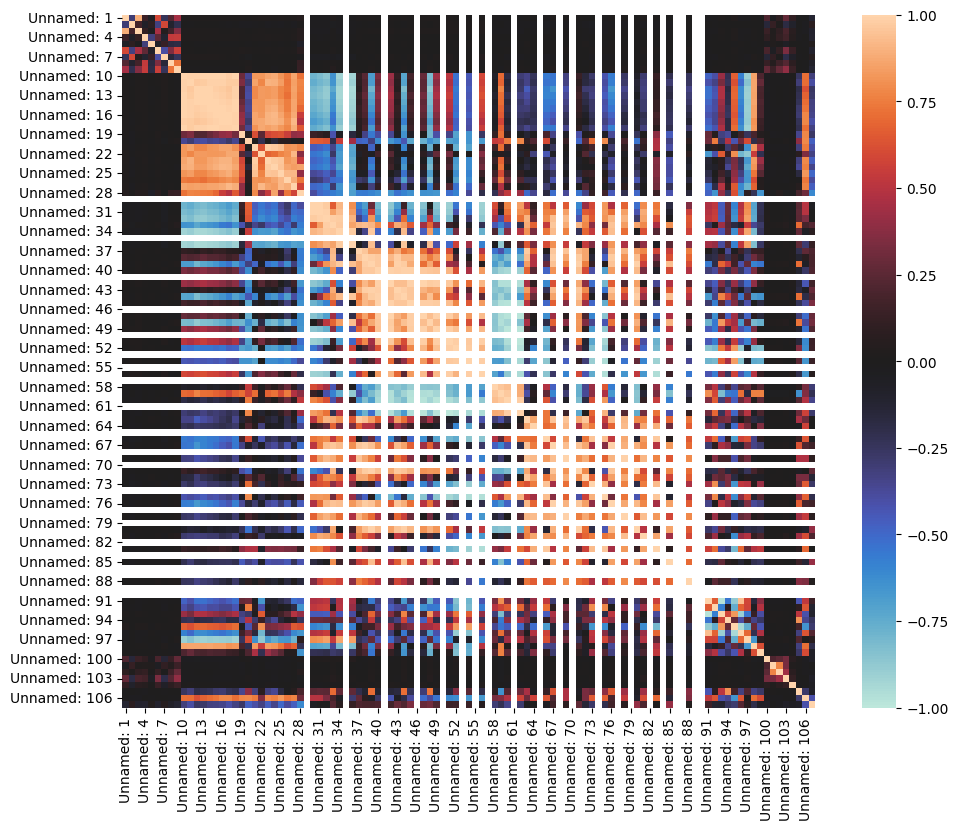

In [25]:
# ヒートマップも作ってみる
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train_corr, square=True, vmax=1, vmin=-1, center=0)